In [31]:
import numpy as np
from numpy import linalg as LA
from ncon import ncon
import matplotlib.pyplot as plt

r_del = 99 eps = 26.036449533981468


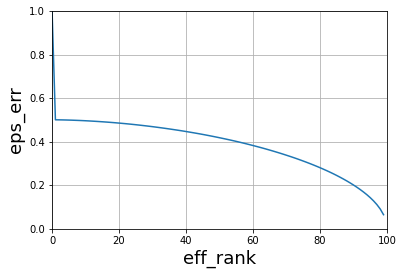

In [37]:
n = 100
A = np.random.rand(n,n,n)
U,S,V = LA.svd(A.reshape((n, n**2)), full_matrices = False)

eps = 1e-2
r_del = 0
while(S[r_del] > eps and r_del < n-1):
    r_del += 1    
epsilon = np.sqrt(sum(S[r_del:]**2))
print("r_del = " + str(r_del), "eps = " + str(epsilon))

eps_AB = []
for r in range(n):
    U_t = U[:,:r]
    S_t = np.diag(S[:r])
    V_t = V[:r,:]

    V_t = S_t @ V_t
    V_t = V_t.reshape((r,n,n))
    V_t = V_t.reshape((r*n,n))
    U_v,S_v,V_v = LA.svd(V_t, full_matrices = False)

    U_v = U_v[:,:r]
    S_v = np.diag(S_v[:r])
    V_v = V_v[:r,:]

    V_v = S_v @ V_v
    U_v = U_v.reshape((r,n,r))

    B = ncon([U_t, U_v, V_v], [[-1,1],[1,-2,2],[2,-3]])
    eps_AB.append(LA.norm(A-B) / LA.norm(A))

x = [i for i in range(n)]
plt.plot(x, eps_AB)
plt.ylabel("eps_err", fontsize=18)
plt.xlabel("eff_rank", fontsize=18)
plt.xlim([0,n])
plt.ylim([0,1])
plt.grid(True)
plt.show()

In [43]:
n = 50
A = []
for i1 in range(n):
    for i2 in range(n):
        for i3 in range(n):
            for i4 in range(n):
                A.append(np.sin(i1+i2+i3+i4))
A = np.array(A)

In [48]:
U,S,V = LA.svd(A.reshape((n**2, n**2)), full_matrices = False)

eps = 3e-7
r_del = 0
while(S[r_del] > eps and r_del < n-1):
    r_del += 1    
epsilon = np.sqrt(sum(S[r_del:]**2))
print("r1 = " + str(r_del), "eps = " + str(epsilon))

r1 = r_del
U1 = U[:,:r1]
S1 = np.diag(S[:r1])
V1 = V[:r1,:]

r1 = 2 eps = 1.3420837404095732e-11


In [51]:
U1 = U1.reshape((n,n*r1))
U11,S11,V11 = LA.svd(U1, full_matrices = False)

eps = 3e-7
r_del = 0
while(S11[r_del] > eps and r_del < n-1):
    r_del += 1    
epsilon = np.sqrt(sum(S11[r_del:]**2))
print("r2 = " + str(r_del), "eps = " + str(epsilon))

r2 = r_del
U11 = U11[:,:r2]
S11 = np.diag(S11[:r2])
V11 = V11[:r2,:]

V11 = S11 @ V11
V11 = V11.reshape((r2,n,r1))

r2 = 2 eps = 2.173796106967566e-15


In [53]:
A12 = S1 @ V1
U12,S12,V12 = LA.svd(A12.reshape((r1*n,n)), full_matrices = False)

eps = 3e-7
r_del = 0
while(S12[r_del] > eps and r_del < n-1):
    r_del += 1    
epsilon = np.sqrt(sum(S12[r_del:]**2))
print("r3 = " + str(r_del), "eps = " + str(epsilon))

r3 = r_del
U12 = U12[:,:r3]
S12 = np.diag(S12[:r3])
V12 = V12[:r3,:]

V12 = S12 @ V12
U12 = U12.reshape((r1,n,r3))

r3 = 2 eps = 1.5501136294462293e-12


In [56]:
A = A.reshape((n,n,n,n))
B = ncon([U11, V11, U12, V12], [[-1,1],[1,-2,2],[2,-3,3],[3,-4]])
eps_AB = LA.norm(A-B) / LA.norm(A)
print("eps_AB = " + str(eps_AB))

eps_AB = 8.473796271288757e-16


In [58]:
r = max(r2, r1, r3)
print("rang of TT is " + str(r))

rang of TT is 2
